In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

In [2]:
df = pd.read_pickle("/Users/alyssaliu/Desktop/StatsM148/updated_feature_engineered_data.pkl")
print(df.shape)
df.head()

(1728485, 10)


,customer_id,account_id,first_event,days_since_start,first_stage,first_event_month,first_event_day,first_event_hour,ideal_journey,promotion_exposure
0,-2147483541,2059949086,12,715,1,10,5,8,0,1
1,-2147481037,-1245770865,12,25,1,8,26,12,0,1
2,-2147474335,-1929965268,2,159,3,4,14,1,1,1
3,-2147474305,1098145658,6,660,5,11,28,22,0,1
4,-2147472167,889210381,12,213,1,2,19,8,1,1


In [3]:
y = df['ideal_journey']
X = df.drop(['customer_id', 'account_id'], axis = 1)

In [4]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
X_scaled = pd.DataFrame(X_scaled, columns=X.columns)

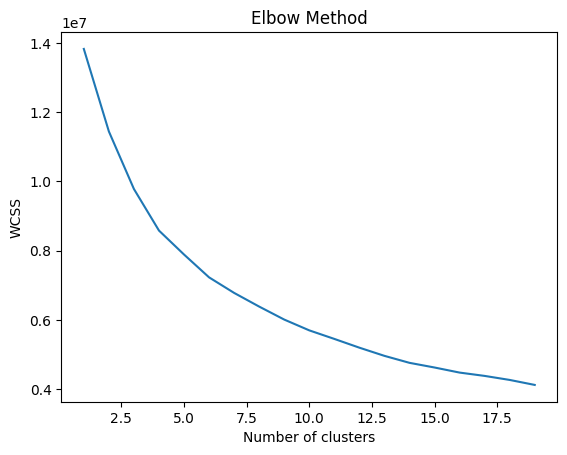

In [5]:
wcss = []
for i in range(1, 20): # Testing 1 to 10 clusters
    kmeans = KMeans(n_clusters=i, init='k-means++', max_iter=300, n_init=10, random_state=0) # multiple initializations
    kmeans.fit(X_scaled)
    wcss.append(kmeans.inertia_) # inertia_ is the WCSS

# Step 4: Plot the Elbow Curve
plt.plot(range(1, 20), wcss)
plt.title('Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

In [6]:
# Apply K-Means Clustering
kmeans = KMeans(n_clusters=6, init='k-means++', max_iter=300, n_init=10, random_state=0)
kmeans.fit(X_scaled)

# The cluster labels for each data point
labels = kmeans.labels_

# You can add these labels back to your original DataFrame if you wish
df['Cluster'] = labels

In [7]:
df.head()

,customer_id,account_id,first_event,days_since_start,first_stage,first_event_month,first_event_day,first_event_hour,ideal_journey,promotion_exposure,Cluster
0,-2147483541,2059949086,12,715,1,10,5,8,0,1,4
1,-2147481037,-1245770865,12,25,1,8,26,12,0,1,4
2,-2147474335,-1929965268,2,159,3,4,14,1,1,1,3
3,-2147474305,1098145658,6,660,5,11,28,22,0,1,0
4,-2147472167,889210381,12,213,1,2,19,8,1,1,3


In [8]:
import seaborn as sns

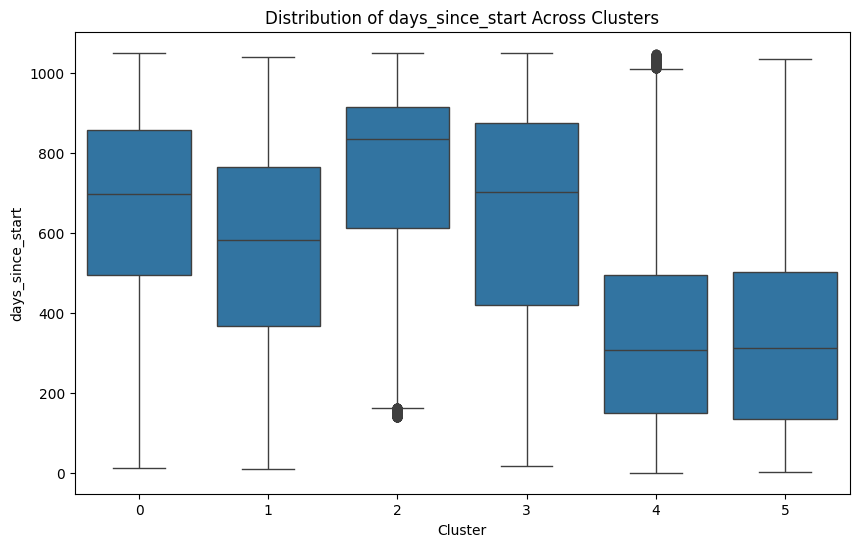

In [9]:
# Choose a feature to plot
feature_to_plot = 'first_event'

plt.figure(figsize=(10,6))
sns.boxplot(x='Cluster', y=feature_to_plot, data=df)
plt.title(f'Distribution of {feature_to_plot} Across Clusters')
plt.show()

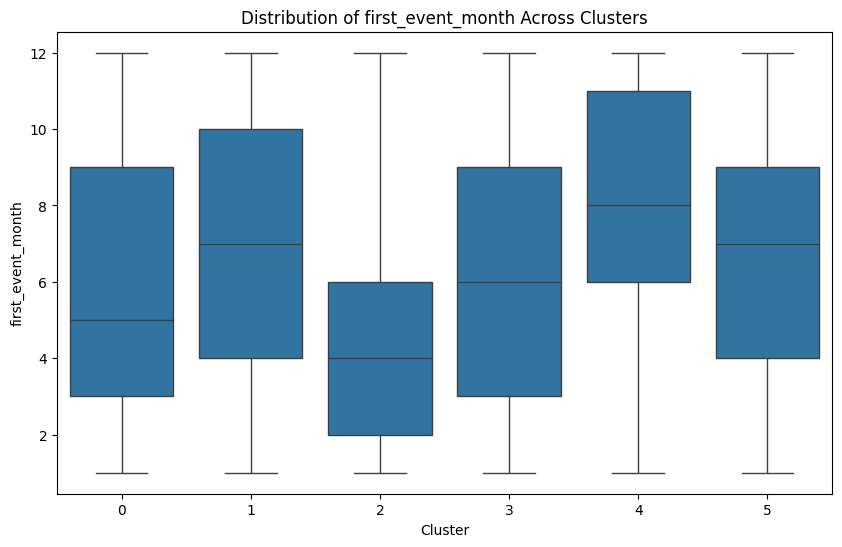

In [10]:
# Choose a feature to plot
feature_to_plot = 'first_event_month'

plt.figure(figsize=(10,6))
sns.boxplot(x='Cluster', y=feature_to_plot, data=df)
plt.title(f'Distribution of {feature_to_plot} Across Clusters')
plt.show()

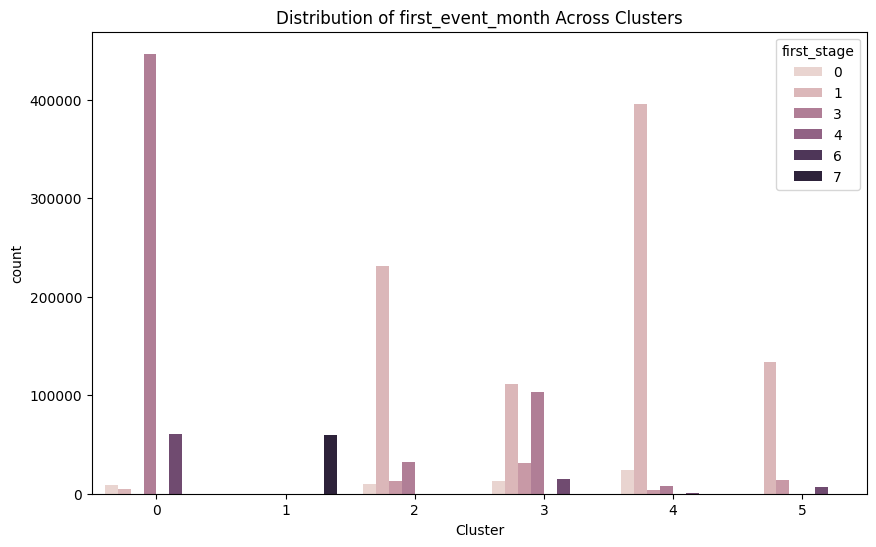

In [11]:
plt.figure(figsize=(10,6))
sns.countplot(hue='first_stage', x='Cluster', data=df)
plt.title(f'Distribution of {feature_to_plot} Across Clusters')
plt.show()

In [12]:
centers = pd.DataFrame(kmeans.cluster_centers_, columns=X_scaled.columns)
print(centers)

   first_event  days_since_start  first_stage  first_event_month  \
0    -1.058130          0.290799     0.717781          -0.084222   
1     1.371440          0.010758     3.260050           0.158246   
2     0.713150          0.711333    -0.563915          -0.635492   
3     0.068054          0.262415    -0.030905          -0.049073   
4     0.348618         -0.744691    -0.728220           0.472144   
5     0.607259         -0.695967    -0.546831           0.176581   

   first_event_day  first_event_hour  ideal_journey  promotion_exposure  
0         0.014012         -0.425597      -0.473657            0.313763  
1        -0.237013         -1.371954      -0.021511            0.311458  
2        -0.005119         -0.019973      -0.473657            0.313905  
3        -0.001171         -0.076837       2.111232            0.313112  
4         0.026405          0.557332      -0.473549            0.313905  
5        -0.017040          0.584474       0.068496           -3.185682  


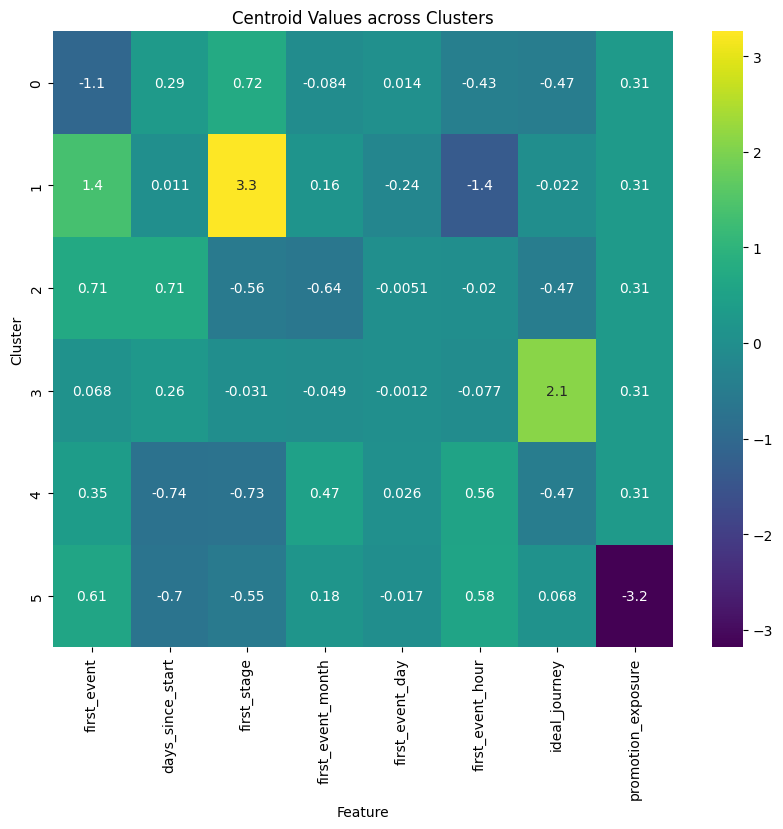

In [13]:
import seaborn as sns

plt.figure(figsize=(10, 8))
sns.heatmap(centers, annot=True, cmap='viridis')
plt.title('Centroid Values across Clusters')
plt.xlabel('Feature')
plt.ylabel('Cluster')
plt.show()

In [14]:
df.head()

,customer_id,account_id,first_event,days_since_start,first_stage,first_event_month,first_event_day,first_event_hour,ideal_journey,promotion_exposure,Cluster
0,-2147483541,2059949086,12,715,1,10,5,8,0,1,4
1,-2147481037,-1245770865,12,25,1,8,26,12,0,1,4
2,-2147474335,-1929965268,2,159,3,4,14,1,1,1,3
3,-2147474305,1098145658,6,660,5,11,28,22,0,1,0
4,-2147472167,889210381,12,213,1,2,19,8,1,1,3


In [15]:
cluster_0 = df[df['Cluster'] == 0]
cluster_0_cust = cluster_0['customer_id'].to_list()
print(cluster_0.shape)

(520615, 11)


In [16]:
cluster_1 = df[df['Cluster'] == 1]
cluster_1_cust = cluster_1['customer_id'].to_list()
print(cluster_1.shape)

(60085, 11)


In [17]:
cluster_2 = df[df['Cluster'] == 2]
cluster_2_cust = cluster_2['customer_id'].to_list()
print(cluster_2.shape)

(287676, 11)


In [18]:
cluster_3 = df[df['Cluster'] == 3]
cluster_3_cust = cluster_3['customer_id'].to_list()
print(cluster_3.shape)

(273712, 11)


In [19]:
cluster_4 = df[df['Cluster'] == 4]
cluster_4_cust = cluster_4['customer_id'].to_list()
print(cluster_4.shape)

(431481, 11)


In [20]:
cluster_5 = df[df['Cluster'] == 5]
cluster_5_cust = cluster_5['customer_id'].to_list()
print(cluster_5.shape)

(154916, 11)


## Inspecting entire dataframe per cluster

In [21]:
df_whole = pd.read_pickle("/Users/alyssaliu/Desktop/StatsM148/cleaned_wide_format_data.pkl")

In [22]:
cluster_1_df = df_whole[df_whole['customer_id'].isin(cluster_1_cust)]
cluster_2_df = df_whole[df_whole['customer_id'].isin(cluster_2_cust)]
cluster_3_df = df_whole[df_whole['customer_id'].isin(cluster_3_cust)]
cluster_4_df = df_whole[df_whole['customer_id'].isin(cluster_4_cust)]
cluster_5_df = df_whole[df_whole['customer_id'].isin(cluster_5_cust)]

In [25]:
cluster_0_df = df_whole[df_whole['customer_id'].isin(cluster_0_cust)]
cluster_0_df.to_pickle("/Users/alyssaliu/Desktop/StatsM148/cluster_0_df.pkl")

In [23]:
## export cluster dataframes for easy access
cluster_1_df.to_pickle("/Users/alyssaliu/Desktop/StatsM148/cluster_1_df.pkl")
cluster_2_df.to_pickle("/Users/alyssaliu/Desktop/StatsM148/cluster_2_df.pkl")
cluster_3_df.to_pickle("/Users/alyssaliu/Desktop/StatsM148/cluster_3_df.pkl")
cluster_4_df.to_pickle("/Users/alyssaliu/Desktop/StatsM148/cluster_4_df.pkl")
cluster_5_df.to_pickle("/Users/alyssaliu/Desktop/StatsM148/cluster_5_df.pkl")

In [24]:
cluster_1_df.head()

,customer_id,account_id,ed_id,event_name,event_timestamp,journey_steps_until_end,stage,account_activation,place_order
81,-2147294441,104246387,"[21, 22, 2, 12, 1, 4, 4, 1, 21, 1, 1, 21, 1, 2...","[catalog_(mail), pre-application_(3rd_party_af...","[2021-09-20 00:00:00+00:00, 2021-11-16 06:00:0...","[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14...","[Prospecting, Discover, Discover, Apply for Cr...",0,0
88,-2147279146,-1839022966,"[21, 2, 12, 1, 21, 1, 1, 21]","[catalog_(mail), campaign_click, application_w...","[2022-01-17 00:00:00+00:00, 2022-03-14 06:00:0...","[1, 2, 3, 4, 5, 6, 7, 8]","[Prospecting, Discover, Apply for Credit, Prom...",0,0
120,-2147224768,1482557947,"[21, 2, 12, 6, 7, 8, 4, 24, 24, 29, 27, 28]","[catalog_(mail), campaign_click, application_w...","[2021-02-15 00:00:00+00:00, 2021-03-04 06:00:0...","[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12]","[Prospecting, Discover, Apply for Credit, Firs...",1,1
170,-2147070521,-1216506929,"[21, 12, 5]","[catalog_(mail), application_web_approved, vie...","[2022-11-11 00:00:00+00:00, 2022-12-17 13:26:3...","[1, 2, 3]","[Prospecting, Apply for Credit, First Purchase]",0,0
174,-2147057611,-201771542,"[21, 19, 19, 19, 19, 19, 3, 12, 19, 4, 4, 11, ...","[catalog_(mail), application_web_view, applica...","[2021-03-15 00:00:00+00:00, 2021-05-10 12:58:3...","[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14...","[Prospecting, Apply for Credit, Apply for Cred...",0,0


In [44]:
def create_flow_counts(df):
    # Initialize an empty list to store the source-target pairs
    source_target_pairs = []

    # Iterate over each list in the DataFrame
    for path in df['stage']:
        # Extract pairs from each list
        pairs = [(path[i], path[i+1]) for i in range(len(path)-1)]
        source_target_pairs.extend(pairs)

    # Convert the pairs into a DataFrame
    pairs_df = pd.DataFrame(source_target_pairs, columns=['source', 'target'])
    
    # Aggregate and count the frequency of each pair
    flow_counts = pairs_df.groupby(['source', 'target']).size().reset_index(name='value')
    
    # Create lists of unique sources and targets to define nodes
    all_nodes = list(set(flow_counts['source']).union(set(flow_counts['target'])))
    node_dict = {node: i for i, node in enumerate(all_nodes)}

    # Map sources and targets to their respective indices
    flow_counts['source_id'] = flow_counts['source'].map(node_dict)
    flow_counts['target_id'] = flow_counts['target'].map(node_dict)
    
    return flow_counts


def create_flow_counts_events(df):
    # Initialize an empty list to store the source-target pairs
    source_target_pairs = []

    # Iterate over each list in the DataFrame
    for path in df['event_name']:
        # Extract pairs from each list
        pairs = [(path[i], path[i+1]) for i in range(len(path)-1)]
        source_target_pairs.extend(pairs)

    # Convert the pairs into a DataFrame
    pairs_df = pd.DataFrame(source_target_pairs, columns=['source', 'target'])
    
    # Aggregate and count the frequency of each pair
    flow_counts = pairs_df.groupby(['source', 'target']).size().reset_index(name='value')
    
    # Create lists of unique sources and targets to define nodes
    all_nodes = list(set(flow_counts['source']).union(set(flow_counts['target'])))
    node_dict = {node: i for i, node in enumerate(all_nodes)}

    # Map sources and targets to their respective indices
    flow_counts['source_id'] = flow_counts['source'].map(node_dict)
    flow_counts['target_id'] = flow_counts['target'].map(node_dict)
    
    return flow_counts

In [31]:
clust_1_flow_counts = create_flow_counts(cluster_1_df)
clust_2_flow_counts = create_flow_counts(cluster_2_df)
clust_3_flow_counts = create_flow_counts(cluster_3_df)
clust_4_flow_counts = create_flow_counts(cluster_4_df)
clust_5_flow_counts = create_flow_counts(cluster_5_df)

In [32]:
clust_1_flow_counts

,source,target,value,source_id,target_id
0,Apply for Credit,Apply for Credit,125033,3,3
1,Apply for Credit,Campaignemail Clicked,2359,3,6
2,Apply for Credit,Credit Account,1028,3,0
3,Apply for Credit,Discover,3827,3,8
4,Apply for Credit,Downpayment,168,3,7
...,...,...,...,...,...
68,Prospecting,Downpayment,63,5,7
69,Prospecting,First Purchase,6500,5,2
70,Prospecting,Order Shipped,133,5,4
71,Prospecting,Promotion Created,50276,5,1


In [33]:
clust_1_flow_counts[clust_1_flow_counts['source'] == clust_1_flow_counts['target']]

,source,target,value,source_id,target_id
0,Apply for Credit,Apply for Credit,125033,3,3
10,Campaignemail Clicked,Campaignemail Clicked,12161,6,6
29,Discover,Discover,5619,8,8
39,Downpayment,Downpayment,3731,7,7
49,First Purchase,First Purchase,724566,2,2
62,Promotion Created,Promotion Created,95442,1,1
72,Prospecting,Prospecting,7815,5,5


## Flow Counts for entire dataframe

In [34]:
flow_counts = create_flow_counts(df_whole)

In [36]:
flow_counts

,source,target,value,source_id,target_id
0,Apply for Credit,Apply for Credit,7041805,3,3
1,Apply for Credit,Campaignemail Clicked,79595,3,6
2,Apply for Credit,Credit Account,19365,3,0
3,Apply for Credit,Discover,178295,3,8
4,Apply for Credit,Downpayment,5823,3,7
...,...,...,...,...,...
69,Prospecting,Downpayment,2232,5,7
70,Prospecting,First Purchase,239394,5,2
71,Prospecting,Order Shipped,4252,5,4
72,Prospecting,Promotion Created,1360044,5,1


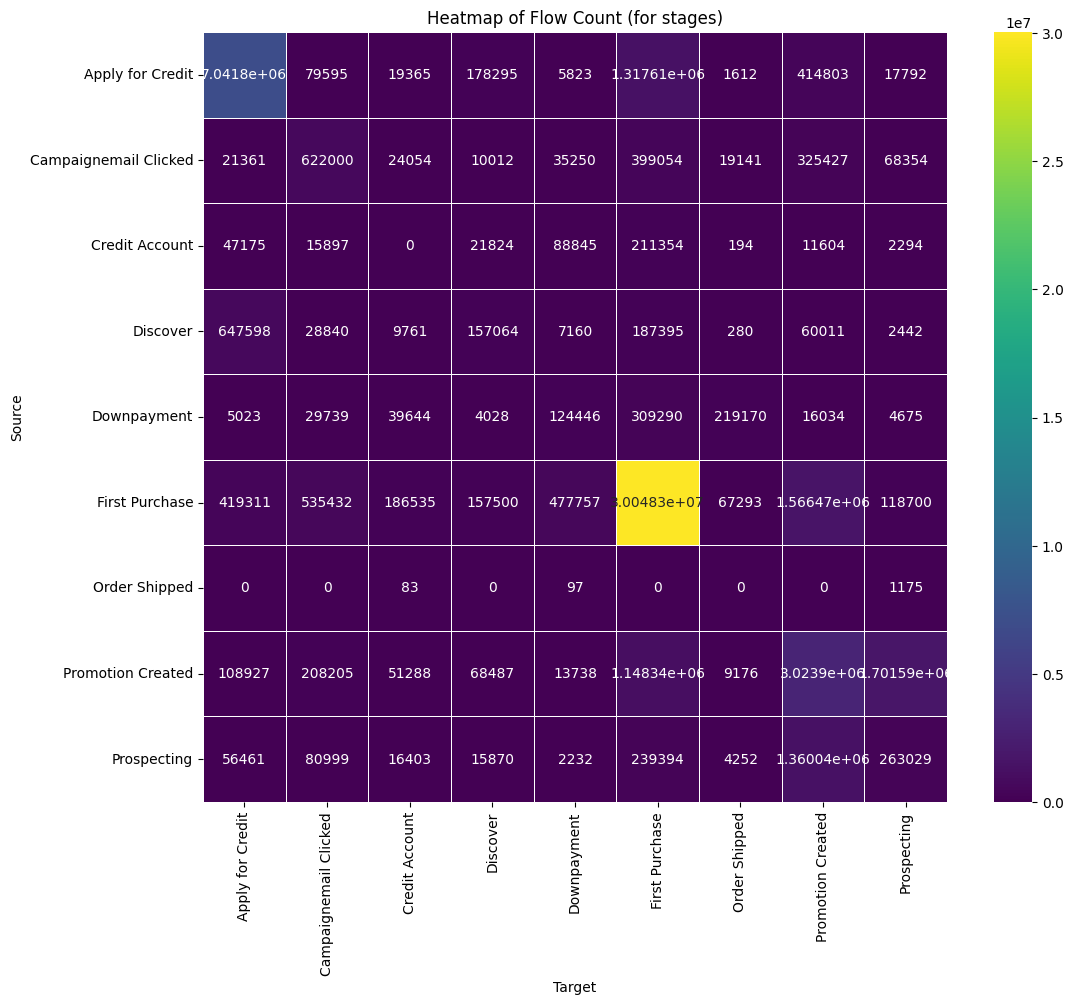

In [55]:
stage_flow_df = flow_counts.pivot_table(index='source', columns='target', values='value', aggfunc='sum')

# In case there are any NaN values after the pivot (which can happen if some combinations of source and target don't exist), you can fill them with zeros
stage_flow_df = stage_flow_df.fillna(0)

# Now create the heatmap using seaborn
plt.figure(figsize=(12, 10))  # You might need to adjust the figure size depending on the number of sources and targets
sns.heatmap(stage_flow_df, annot=True, cmap='viridis', fmt='g', linewidths=.5)
plt.title('Heatmap of Flow Count (for stages)')
plt.ylabel('Source')
plt.xlabel('Target')
plt.show()

In [40]:
flow_counts[flow_counts['source'] == flow_counts['target']]

,source,target,value,source_id,target_id
0,Apply for Credit,Apply for Credit,7041805,3,3
10,Campaignemail Clicked,Campaignemail Clicked,622000,6,6
29,Discover,Discover,157064,8,8
39,Downpayment,Downpayment,124446,7,7
49,First Purchase,First Purchase,30048259,2,2
63,Promotion Created,Promotion Created,3023899,1,1
73,Prospecting,Prospecting,263029,5,5


### Take a closer look at event flows where stage is First Purchase

In [45]:
event_flow_counts = create_flow_counts_events(df_whole)
event_flow_counts

,source,target,value,source_id,target_id
0,account_activitation,account_downpaymentcleared,77770,18,6
1,account_activitation,account_downpaymentreceived,1786,18,19
2,account_activitation,add_to_cart,4366,18,15
3,account_activitation,application_phone_approved,3349,18,24
4,account_activitation,application_phone_declined,24,18,2
...,...,...,...,...,...
544,view_cart,place_order_web,8308,0,20
545,view_cart,pre-application_(3rd_party_affiliates),677,0,22
546,view_cart,promotion_created,302074,0,4
547,view_cart,site_registration,5225,0,16


In [54]:
def_df = pd.read_csv("/Users/alyssaliu/Desktop/StatsM148/Event Definitions.csv")
first_purchase = list(def_df[def_df['stage'] == 'First Purchase']['event_name'].values)

In [64]:
first_purchase_flow_df = event_flow_counts[(event_flow_counts['source'].isin(first_purchase)) & (event_flow_counts['target'].isin(first_purchase))]
# first_purchase_flow_df = first_purchase_flow_df[first_purchase_flow_df['source'] != first_purchase_flow_df['target']]
first_purchase_flow_df

,source,target,value,source_id,target_id
61,add_to_cart,add_to_cart,73384,15,15
69,add_to_cart,begin_checkout,96941,15,7
70,add_to_cart,browse_products,1850246,15,10
77,add_to_cart,place_order_phone,383,15,12
78,add_to_cart,place_order_web,5355,15,20
82,add_to_cart,view_cart,1795520,15,0
231,begin_checkout,add_to_cart,47627,7,15
239,begin_checkout,begin_checkout,232073,7,7
240,begin_checkout,browse_products,249841,7,10
247,begin_checkout,place_order_phone,1942,7,12


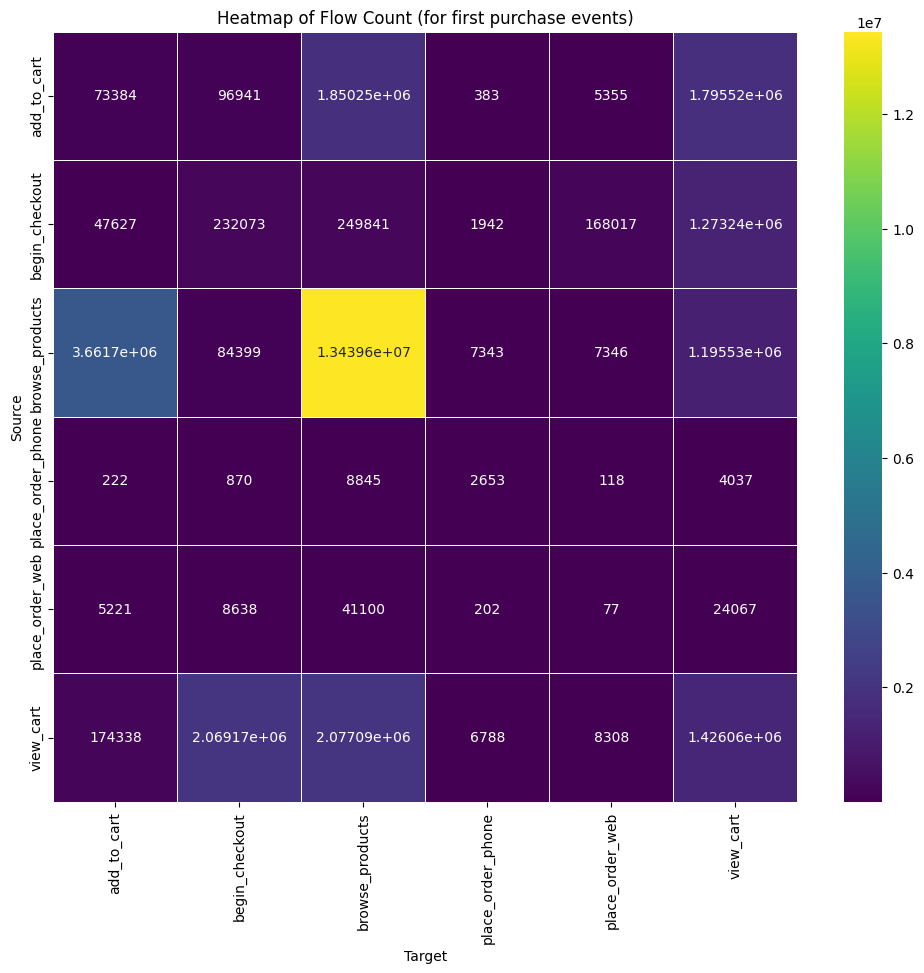

In [65]:
fp_flow = first_purchase_flow_df.pivot_table(index='source', columns='target', values='value', aggfunc='sum')

# In case there are any NaN values after the pivot (which can happen if some combinations of source and target don't exist), you can fill them with zeros
fp_flow = fp_flow.fillna(0)

# Now create the heatmap using seaborn
plt.figure(figsize=(12, 10))  # You might need to adjust the figure size depending on the number of sources and targets
sns.heatmap(fp_flow, annot=True, cmap='viridis', fmt='g', linewidths=.5)
plt.title('Heatmap of Flow Count (for first purchase events)')
plt.ylabel('Source')
plt.xlabel('Target')
plt.show()

## Now plot differences between clusters

In [70]:
cluster_0.drop(['customer_id', 'account_id'], axis=1)


,first_event,days_since_start,first_stage,first_event_month,first_event_day,first_event_hour,ideal_journey,promotion_exposure,Cluster
3,6,660,5,11,28,22,0,1,0
6,2,163,3,4,10,2,0,1,0
15,4,490,5,5,17,19,0,1,0
16,2,938,3,2,24,6,0,1,0
19,2,710,3,10,10,6,0,1,0
...,...,...,...,...,...,...,...,...,...
1728467,3,766,1,8,14,12,0,1,0
1728472,2,179,3,3,25,0,0,1,0
1728476,2,944,3,2,18,6,0,1,0
1728478,2,937,3,2,25,6,0,1,0


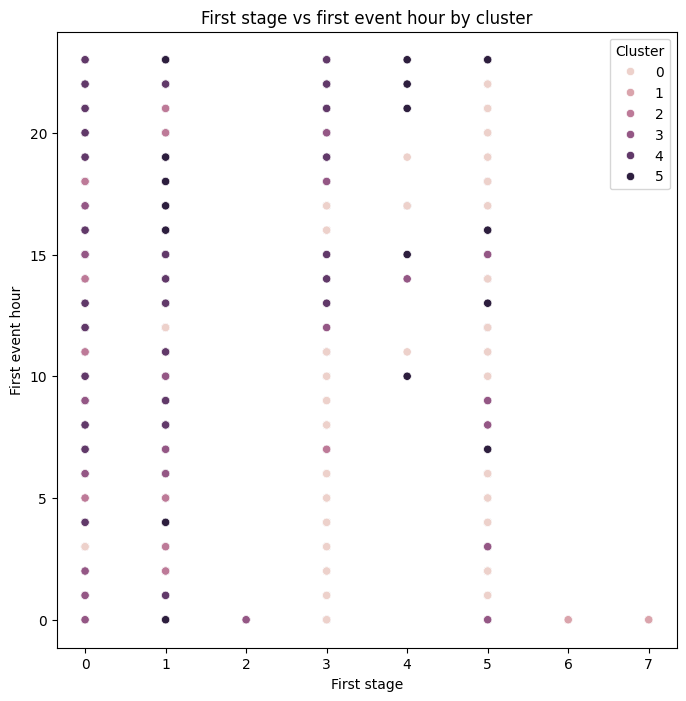

In [75]:
plt.figure(figsize=(8, 8))
sns.scatterplot(x='first_stage', y='first_event_hour', data=df, hue='Cluster')
plt.title('First stage vs first event hour by cluster')
plt.xlabel('First stage')
plt.ylabel('First event hour')
plt.show()

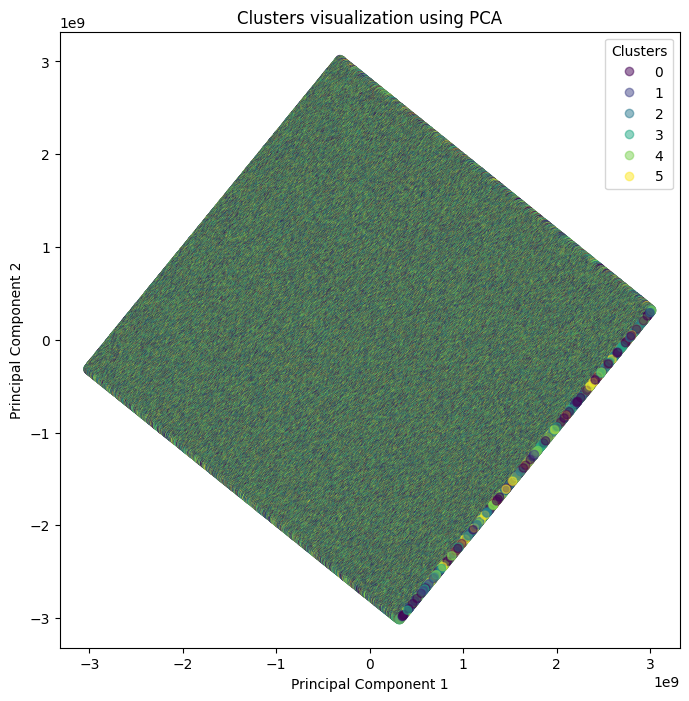

In [71]:
from sklearn.decomposition import PCA

# Load your data
# df = pd.read_csv('your_data.csv')  # Replace with your actual data loading line

# Let's assume 'Cluster' is the name of the column containing the cluster labels
# Perform PCA to reduce to 2 dimensions for visualization
pca = PCA(n_components=2)
principal_components = pca.fit_transform(df.drop('Cluster', axis=1))

# Create a DataFrame containing the 2D projection plus the cluster labels
pca_df = pd.DataFrame(data=principal_components, columns=['PC1', 'PC2'])
pca_df['Cluster'] = df['Cluster']

# Plot the clusters
plt.figure(figsize=(8, 8))
scatter = plt.scatter(pca_df['PC1'], pca_df['PC2'], c=pca_df['Cluster'], cmap='viridis', alpha=0.5)
plt.title('Clusters visualization using PCA')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.legend(*scatter.legend_elements(), title="Clusters")
plt.show()


In [76]:
from sklearn.manifold import TSNE

# Assuming df is your dataframe and 'Cluster' is the cluster label column
# X = df.drop('Cluster', axis=1).values  # Drop the cluster column
# y = df['Cluster'].values

# # Standardize features
# scaler = StandardScaler()
# X_scaled = scaler.fit_transform(X)

# Apply t-SNE to the scaled data
tsne = TSNE(n_components=2, perplexity=30.0, n_iter=1000, random_state=42)
X_tsne = tsne.fit_transform(X_scaled)

# Plot the result of t-SNE
plt.figure(figsize=(12, 10))
sns.scatterplot(X_tsne[:, 0], X_tsne[:, 1], hue=y, palette='viridis', alpha=0.5)
plt.title('t-SNE Clusters Visualization')
plt.xlabel('t-SNE Feature 1')
plt.ylabel('t-SNE Feature 2')
plt.legend(title='Clusters')
plt.show()


KeyboardInterrupt: 